****
# Introduction #
****

**This notebook will be showing how to load,access the data along with being able to push these images into training and testing sets for training or testing purposes**

****
# Reading the Directories #
****

In [1]:
# importing

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Reading the directories

train=r'/kaggle/input/fer2013/archive (7)/train'
test=r'/kaggle/input/fer2013/archive (7)/test'

****
# Loading the Data from the Directories #
****

In [3]:
# Rescaling pixel values and loading data from the Directories
datagen = ImageDataGenerator(rescale=1.0 / 255)
# Training Data
train_generator = datagen.flow_from_directory(
    train,
    target_size=(48, 48), 
    batch_size=32,
    class_mode='categorical'
)

# Testing Data
test_generator = datagen.flow_from_directory(
    test,
    target_size=(48, 48),  
    batch_size=32,
    class_mode='categorical'
)

Found 24176 images belonging to 5 classes.
Found 6043 images belonging to 5 classes.


****
# Displaying Training and Testing Images #
****

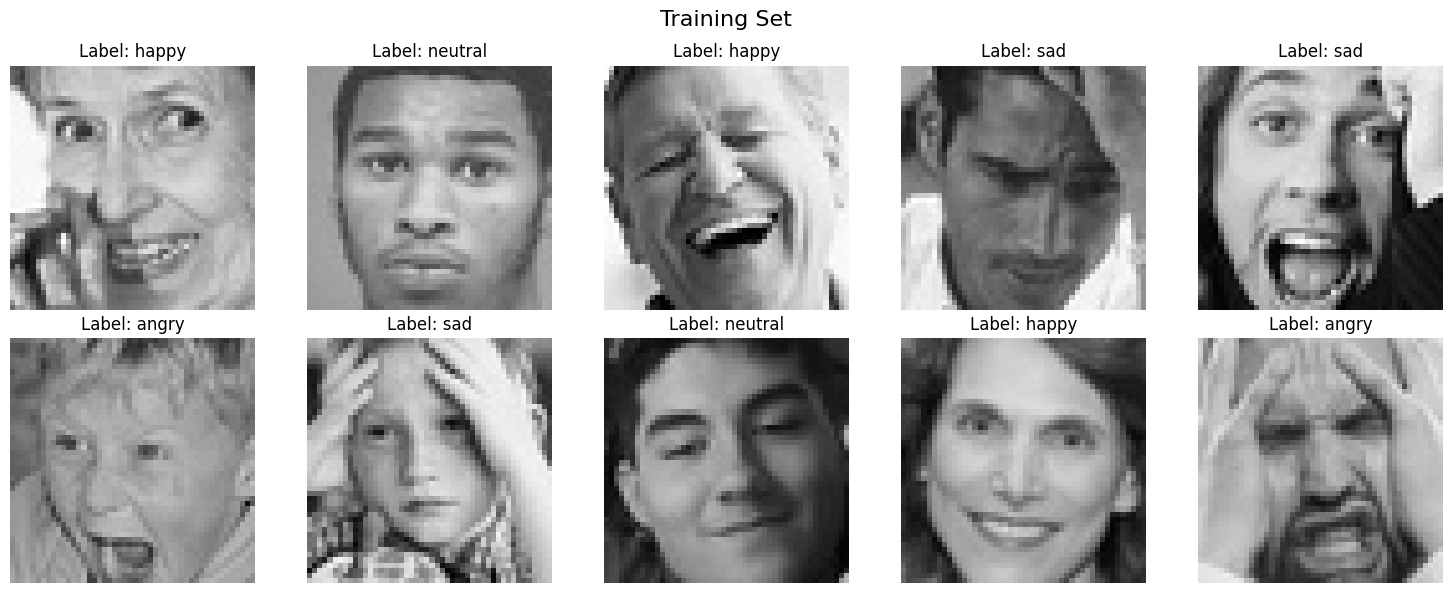

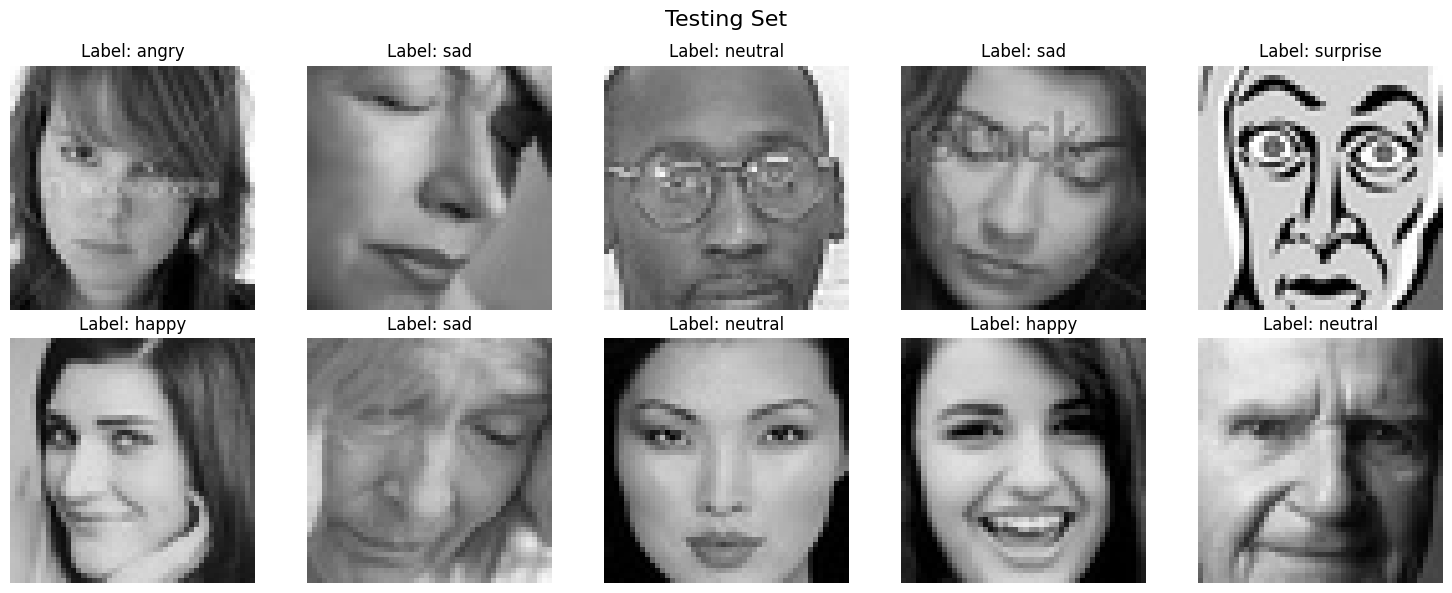

In [4]:
# Displaying the training and testing datsets
# Only 10 Images from each set

def plot_images_from_generator(generator, title, num_images=10, images_per_row=5):
    images, labels = next(generator)
    images = images[:num_images]
    labels = labels[:num_images]
    num_rows = (num_images + images_per_row - 1) // images_per_row
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 3 * num_rows))
    fig.suptitle(title, fontsize=16)
    axes = axes.flatten()
    for i in range(num_images):
        img = images[i]
        label = labels[i]
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Label: {list(generator.class_indices.keys())[label.argmax()]}")
    
    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_images_from_generator(train_generator, "Training Set", num_images=10, images_per_row=5)
plot_images_from_generator(test_generator, "Testing Set", num_images=10, images_per_row=5)

****
# Class Distribution #
****

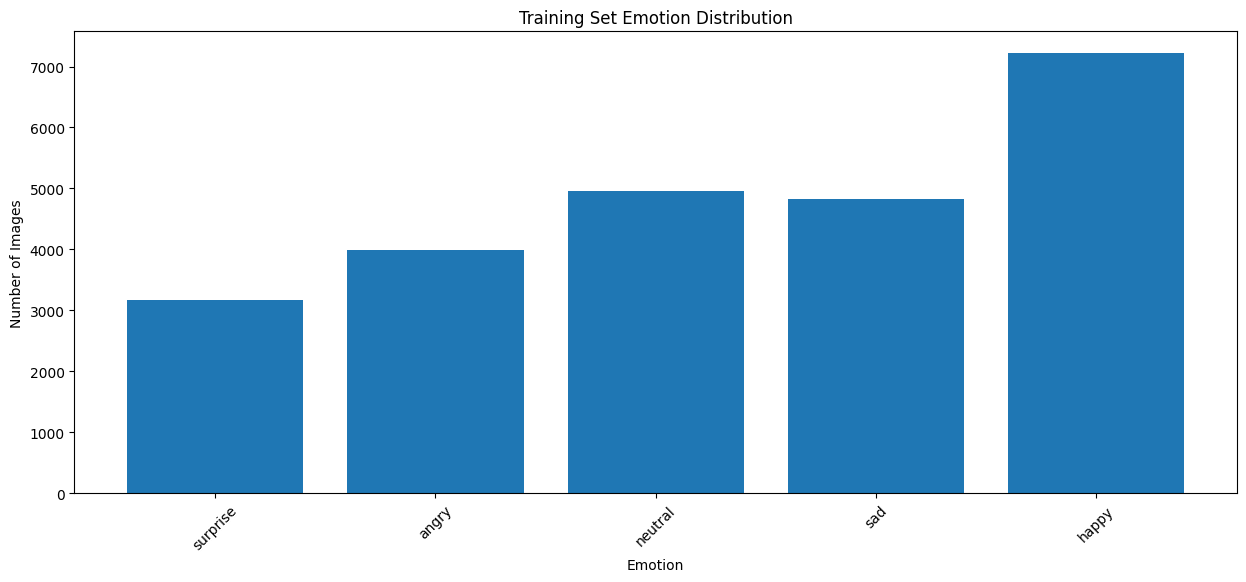

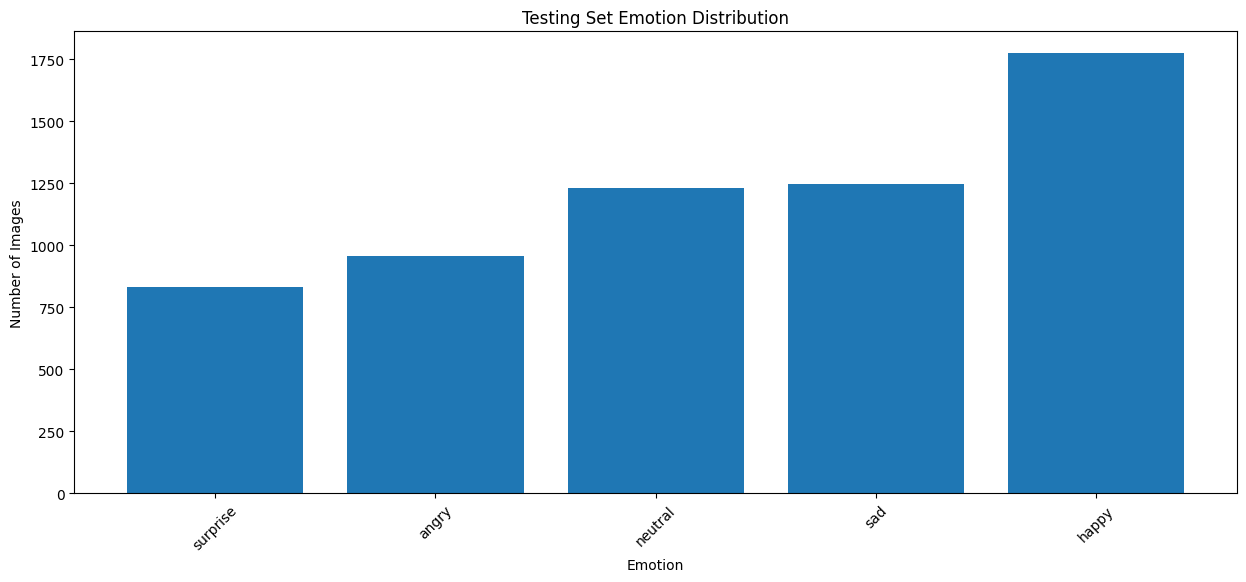

In [5]:
# Let us take a look at how are classes are distributed in other words how the emotions are distributed in the data

def plot_class_distribution(directory, title):
    class_names = os.listdir(directory)
    class_counts = []
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            class_counts.append(len(os.listdir(class_dir)))

    plt.figure(figsize=(15, 6))
    plt.bar(class_names, class_counts)
    plt.title(title)
    plt.xlabel('Emotion')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train, "Training Set Emotion Distribution")
plot_class_distribution(test, "Testing Set Emotion Distribution")

****
# Feedback and Suggestions #
****

**Please Provide feedback and suggestions to improve this dataset**

**If you liked this Notebook and the dataset or if you have found it helpful Kindly Upvote  :)**